____
# Exploratory Data Analysis
____
Going through the basics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset into a dataframe

In [2]:
books=pd.read_csv("./course_datasets/eda_datasets/datasets/clean_books.csv")

### 1. Initial Exploration
Checking out the dataset. _Applying  various **summarizing methods** to the dataframe_. Can help identify (& address) missing values / fix data types of columns etc.

`.info()` -- summary of data types of a column and also count of non-null (or non-NaN) values across all columns in the dataframe

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [4]:
books.head(2)

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction


`.value_counts()` -- helps answer queries on categorical values in a column. 

Helps to decide which column(s) can be converted to a 'category' data type that'll inturn reduce the memory size of the dataset

In [5]:
books["genre"].value_counts()

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

`.describe()` -- gives a statistical summary of all columns containing all-numeric data values

In [6]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


### 2. Understanding the data distribution
_Understanding how ratings are distributed_. Using histograms & boxplots to gain an understanding of how data is distributed.

From below histograms, its clear that a majority of books have ratings between 4.5 to 4.8 

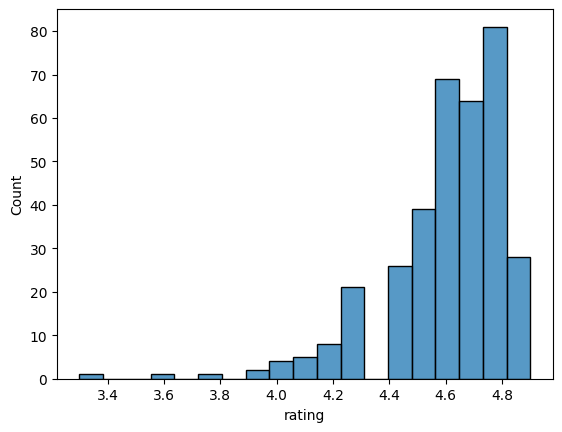

In [7]:
sns.histplot(data=books, x="rating")
plt.show()

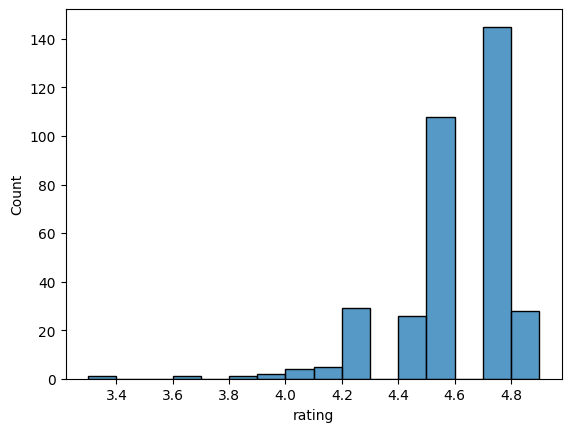

In [8]:
# Setting the binwidth
sns.histplot(data=books, x="rating", binwidth=0.1)
plt.show()

## 3. Data Validation
Essential to know if the data is as expected before we can proceed further into EDA.

`df.dtypes` is used to find out the data type of each column of the dataframe

In [9]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

Use `df["col_name"].astype()` to change the dtype of a dataframe column.

Check if a column's dtype can are as expected using `df["col_name"].isin([`_`list of names to check`_`])`

In [10]:
books["genre"].isin(["Fiction", "Non Fiction"])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [11]:
books["genre"].isin(["Fiction", "Non Fiction"]).value_counts()

genre
True     310
False     40
Name: count, dtype: int64

The `~` operator can be used to invert the result of the `.isin` method.

In [12]:
~books["genre"].isin(["Fiction", "Non Fiction"]).value_counts()

genre
True    -311
False    -41
Name: count, dtype: int64

Thus we find there is a third category - 'childrens' in the dataset 

In [13]:
books[~books["genre"].isin(["Fiction", "Non Fiction"])]

,name,author,rating,year,genre
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens
26,Baby Touch and Feel: Animals,DK,4.6,2015,Childrens
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,2017,Childrens
37,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,2011,Childrens
53,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,2015,Childrens
57,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,2013,Childrens
58,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,2009,Childrens
59,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,2014,Childrens
60,Difficult Riddles For Smart Kids: 300 Difficul...,M Prefontaine,4.6,2019,Childrens
65,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,2009,Childrens


### Validating data of a particular type:
`df.select_dtypes(`_`"int64"`_`)` -- Filter columns containing (or not containing) particular dtype(s)

In [14]:
books.select_dtypes("number").head(3)

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018


In [15]:
books.select_dtypes("float64").head(3)

,rating
0,4.7
1,4.6
2,4.7


In [16]:
books.select_dtypes(exclude='number')

,name,author,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,Non Fiction
1,11/22/63: A Novel,Stephen King,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,Non Fiction
3,1984 (Signet Classics),George Orwell,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,Childrens
...,...,...,...
345,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,Non Fiction
346,Winter of the World: Book Two of the Century T...,Ken Follett,Fiction
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,Non Fiction
348,Wonder,R. J. Palacio,Fiction


### Using statstical methods on numerical columns

In [17]:
books["year"].min()

np.int64(2009)

In [18]:
books["year"].max()

np.int64(2019)

### Advanced stats methods to understand data distribution
Use of boxplots - we can get a sense that most of the books in this dataset were publised between 2010-2016

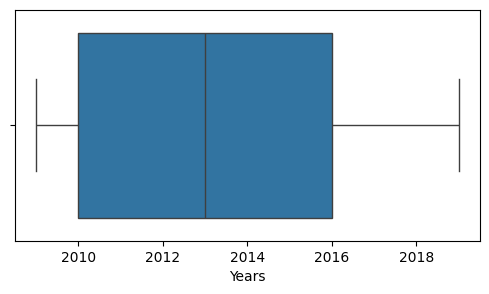

In [19]:
plt.figure(figsize=(6,3))
sns.boxplot(data=books, x="year")
plt.xlabel("Years")
plt.show()

Creating further sub-categories gives better overview of the data distribution for each genre.

Most childrens books have been added much recently

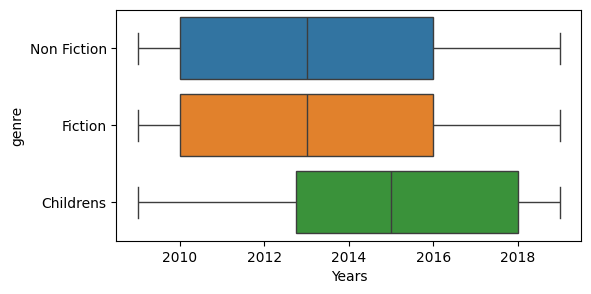

In [20]:
plt.figure(figsize=(6,3))
sns.boxplot(data=books, x="year", y="genre", hue="genre")
plt.xlabel("Years")
plt.show()

## 4. Data summarization
`df.groupby("`_`groupby_this_col`_`").`_`aggregating_function()`_` -- helps group data by category. 

The aggregating func dictates *HOW* the grouped data (columns wuth numerical dtypes) will be summarized (i.e. mean , median etc.)

The resulting output shows that books from Childrens genre have higher ratings on average .


In [21]:
books[["genre","rating","year"]].groupby(["genre"]).mean()

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [22]:
# Another approach of passing aggregating function -- when multiple agg funcs are to be passed
books[["genre","rating","year"]].groupby(["genre"]).agg(["mean","median"])

rating                year        
                 mean median         mean  median
genre                                            
Childrens    4.780000    4.8  2015.075000  2015.0
Fiction      4.570229    4.6  2013.022901  2013.0
Non Fiction  4.598324    4.6  2013.513966  2013.0

In [23]:
# Using a dict to pass specific aggregations to be applied to each of the columns
books[["genre","rating","year"]].groupby(["genre"]).agg({"rating":"mean","year":"median"})

,rating,year
genre,,
Childrens,4.780000,2015.0
Fiction,4.570229,2013.0
Non Fiction,4.598324,2013.0


The Fiction genre has the highest standard deviation , meaning there is a higher degree of variance in ratings of this genre

In [24]:
# Using a tuple to name each of the specific aggregations on each of the columns
books[["genre","rating","year"]].groupby(["genre"]).agg(mean_rating=("rating","mean"),std_rating=("rating","std"),median_yr=("year","median"))

,mean_rating,std_rating,median_yr
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


### Adding multiple columns to a `groupby`
Introduces sub-categories. This means the resultant `groupby` output will be multi-indexed. 

In [25]:
# Adding layers to groupby
books[["genre","rating","year"]].groupby(["genre","year"]).agg({"rating":"mean","year":"median"})

rating    year
genre       year                  
Childrens   2009  4.800000  2009.0
            2010  4.800000  2010.0
            2011  4.600000  2011.0
            2012  4.833333  2012.0
            2013  4.633333  2013.0
            2014  4.700000  2014.0
            2015  4.740000  2015.0
            2016  4.833333  2016.0
            2017  4.900000  2017.0
            2018  4.833333  2018.0
            2019  4.812500  2019.0
Fiction     2009  4.561905  2009.0
            2010  4.580000  2010.0
            2011  4.569231  2011.0
            2012  4.353846  2012.0
            2013  4.562500  2013.0
            2014  4.650000  2014.0
            2015  4.320000  2015.0
            2016  4.650000  2016.0
            2017  4.676923  2017.0
            2018  4.585714  2018.0
            2019  4.733333  2019.0
Non Fiction 2009  4.576923  2009.0
            2010  4.539130  2010.0
            2011  4.493750  2011.0
            2012  4.533333  2012.0
            2013  4.607143  2013.0
            2014  4.630000  2014.0
            2015  4.670000  2015.0
            2016  4.687500  2016.0
            2017  4.591667  2017.0
            2018  4.605882  2018.0
            2019  4.676923  2019.0

In [26]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


### Plotting the standard deviation using a bar plot

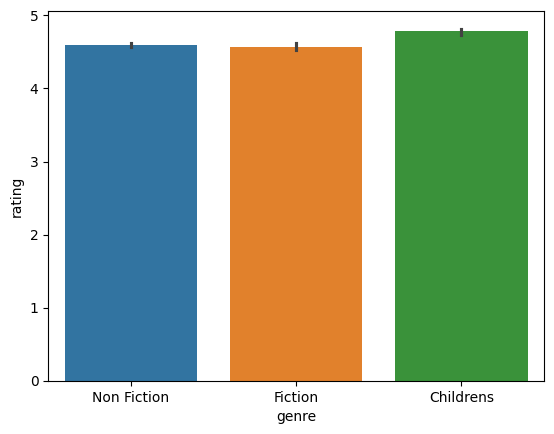

In [27]:
sns.barplot(data=books,x="genre",y="rating",hue="genre")
plt.show()

## 5. Handling missing data
### Strategies to handle missing data
- Drop missing values:
    - As a general thumb rule, when missing values are  5% or less of the total missing values
    - But one needs to decide whether the impact of dropping values is negligible (e.g. on the visualization)
- Account for the missing values using statistical methods such as mean /median etc. or distribution
    - Can be sub-grouped based on the requirement

In [28]:
planes = pd.read_csv("./course_datasets/eda_datasets/datasets/planes.csv")

In [29]:
planes.shape

(10660, 11)

So there *are* NaN values in all columns of the dataset

Also,several columns with date & timestamps can be converted into a dateTime appropriate dtypes. 'Airline' can be categorized

In [30]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [31]:
planes[planes["Price"]==planes["Price"].min()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4058,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759.0
4266,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759.0
4829,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759.0
10490,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759.0


Finding the threshold of the dataframe --columns with missing values below or equal to this value that can be dropped.

In [32]:
# Considering 2% of total column values are NaN values
len(planes) * 0.02
threshold = len(planes) * 0.02
print(threshold)

213.20000000000002


A summary of missing values for all columns

In [33]:
planes.isna().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

**Finding columns with no. of missing values <= threshold**

In [34]:
planes.isna().sum() <= (len(planes) * 0.02)

Airline            False
Date_of_Journey    False
Source              True
Destination        False
Route              False
Dep_Time           False
Arrival_Time        True
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [35]:
planes.columns[planes.isna().sum() > 0.02]

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [36]:
for_fillna = planes.columns[planes.isna().sum() > 0.02]
print(for_fillna)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [37]:
for col in for_fillna:
    planes["new_col"]=planes[col].fillna(planes[col].mode())

In [38]:
planes["Price"].mode()

0    10262.0
Name: Price, dtype: float64

In [39]:
planes.isna().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
new_col            616
dtype: int64

In [40]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,new_col
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,11087.0


In [41]:
# finding mean & median ticket prices of each airline
planes.groupby(["Airline"])["Price"].agg(["mean","median","std",("min_price","min"),("max_price","max")]).reset_index()

,Airline,mean,median,std,min_price,max_price
0,Air Asia,5629.657627,5192.0,2016.738954,3383.0,13474.0
1,Air India,9593.015605,9443.0,3865.871975,2050.0,31945.0
2,GoAir,5914.477273,5135.0,2790.815129,3398.0,22794.0
3,IndiGo,5684.994638,5013.0,2266.753552,2227.0,19685.0
4,Jet Airways,11605.228850,11467.0,4230.748840,1840.0,54826.0
5,Multiple carriers,10867.189189,9871.0,3763.674706,5797.0,36983.0
6,SpiceJet,4290.035952,3873.0,1790.851944,1759.0,23267.0
7,Vistara,7831.260970,8028.0,2864.267802,3687.0,21730.0


In [42]:
planes.groupby("Airline")["Price"].median()

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5135.0
IndiGo                5013.0
Jet Airways          11467.0
Multiple carriers     9871.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64

In [43]:
# Adding multi-indexing
planes.groupby(["Source","Airline"])[["Price"]].median()

Price
Source   Airline                   
Banglore Air Asia            4282.0
         Air India           7276.0
         GoAir               4239.0
         IndiGo              4823.0
         Jet Airways         8016.0
         SpiceJet            3971.0
         Vistara             5403.0
Chennai  Air India           4667.0
         IndiGo              3858.0
         SpiceJet            3597.0
         Vistara             6285.5
Delhi    Air Asia            6752.0
         Air India           9653.0
         GoAir               5842.0
         IndiGo              6496.0
         Jet Airways        12898.0
         Multiple carriers  10051.0
         SpiceJet            5583.0
         Vistara             6216.0
Kolkata  Air Asia            4409.0
         Air India          10676.0
         GoAir               7335.0
         IndiGo              4804.0
         Jet Airways        11467.0
         SpiceJet            3873.0
         Vistara             8820.0
Mumbai   Air India           3100.0
         IndiGo              3175.0
         Jet Airways         5678.0
         SpiceJet            2017.0
         Vistara            12395.0

In [44]:
planes["Additional_Info"].value_counts()

Additional_Info
No info                         7867
In-flight meal not included     1874
No check-in baggage included     299
1 Long layover                    18
Change airports                    7
No Info                            2
1 Short layover                    1
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

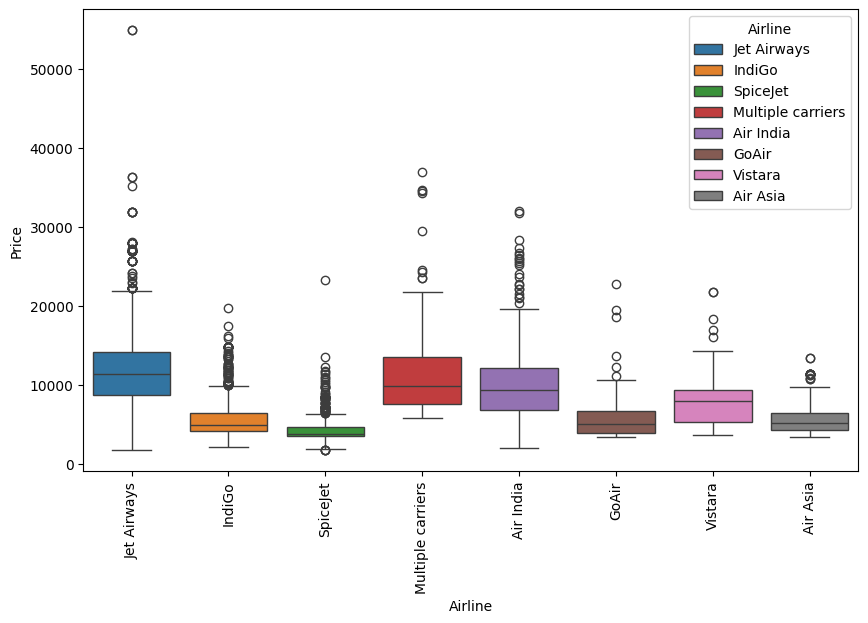

In [45]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=planes, x="Airline", y="Price", hue="Airline")
plt.xticks(rotation=90)
plt.show()

In [46]:
airline_prices = planes.groupby("Airline")["Price"].median()
median_prices_dict = airline_prices.to_dict()
print(median_prices_dict)

{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5135.0, 'IndiGo': 5013.0, 'Jet Airways': 11467.0, 'Multiple carriers': 9871.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}


In [47]:
threshold = len(planes) * 0.05
print(threshold)
# Creating a filter of columns to be dropped
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
print(cols_to_drop)

533.0
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')


In [48]:
# checking the NaN value count for each column
planes.isna().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
new_col            616
dtype: int64

In [49]:
# Dropping cols with NAN values below 5% threshold
planes.dropna(subset=cols_to_drop, inplace=True)

In [50]:
# checking the NEW NaN value count for each column
planes.isna().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
new_col            368
dtype: int64

Now all rows with NaN values below threshold values have been dropped. 

NOTE: that `dropna()`'s `how` parameter default i `'Any'` -- meaning an entire row is dropped if any of the values in that row are NaN. 

The `prices` & `Additional__Info` columns still contain NaN values that will have to be handled separately. These columns were not passed in the `cols_to_drop` list since their original NaN value counts exceeded the 5% threshold (these columns had 616 NaN values each).

Removed the calculated column `new_col`

In [51]:
planes.drop("new_col", axis=1, inplace=True)

In [52]:
planes.isna().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64

### Handling missing numerical data:
The missing values in `Price` column will be interpolated with median values of ticket prices for that respective airline.

So we'll first create a dict of median ticket prices `groupby` airline. Then use `map` func to fill each airline median value based on the `Airline` column.

NOTE: that the method to fill missing numerical data will differ based on the context -- time-series data might need interpolation while missing salaries would be better addressed with median salary etc.


In [53]:
planes["Price"].dtype

dtype('float64')

In [54]:
# Filtering all rows where prices are NaN values
planes[planes["Price"].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
60,Multiple carriers,3/06/2019,Delhi,Cochin,DEL → BOM → COK,08:45,19:00,10h 15m,1 stop,No info,NaN
76,Jet Airways,15/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,12:35 16 Jun,19h 5m,1 stop,In-flight meal not included,NaN
89,Multiple carriers,6/03/2019,Delhi,Cochin,DEL → BOM → COK,02:15,13:20,11h 5m,1 stop,No info,NaN
99,Jet Airways,9/06/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 10 Jun,12h 15m,1 stop,No info,NaN
121,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10531,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,19:00,13h 30m,2 stops,In-flight meal not included,NaN
10571,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,NaN
10578,Multiple carriers,6/03/2019,Delhi,Cochin,DEL → BOM → COK,10:20,21:00,10h 40m,1 stop,No info,NaN
10585,Jet Airways,12/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,04:40 13 May,22h 10m,1 stop,In-flight meal not included,NaN


In [55]:
planes.loc[[60,76]]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
60,Multiple carriers,3/06/2019,Delhi,Cochin,DEL → BOM → COK,08:45,19:00,10h 15m,1 stop,No info,NaN
76,Jet Airways,15/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,12:35 16 Jun,19h 5m,1 stop,In-flight meal not included,NaN


In [56]:
# Creating a dict of airline median ticket prices
median_prices_dict = planes.groupby("Airline")["Price"].median().to_dict()
print(median_prices_dict)

{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11507.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}


In [57]:
# filling NaN values with respecitve airline median ticket prices
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(median_prices_dict))

In [58]:
# Checking for few such rows that had NaN prices earlier
planes.loc[[60,76]]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
60,Multiple carriers,3/06/2019,Delhi,Cochin,DEL → BOM → COK,08:45,19:00,10h 15m,1 stop,No info,10197.0
76,Jet Airways,15/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,12:35 16 Jun,19h 5m,1 stop,In-flight meal not included,11507.0


## Numeric missing values -- When to use ? Which method?

**Statistical Filling (Mean/Median/Mode):**
- Numerical data with roughly normal distribution
- Missing values are random (not systematic)
- You want to preserve the overall distribution
- Small to moderate amount of missing data (<20%)
**Avoid if data contains skewed values, time-series data**

**Forward/Backward Fill:**
- Time series data with temporal continuity
- Sequential data where previous/next values are meaningful
- Stock prices, sensor readings, daily measurements
- Data sorted by time or sequence

**Interpolation:**
- Time series with smooth trends
- Scientific measurements with continuous values
- Missing values between known data points
- Data with mathematical relationships
    df['temperature'].interpolate(moethod)

**Constant Value Fill:**
- Missing values have a specific meaning (e.g., 0 for "none")
- Categorical data with obvious default
- Binary features where missing = False
- Domain knowledge suggests a specific value

**Group-based Fill:**
- Data has meaningful groups/categories
- Missing values likely relate to group characteristics
- Different groups have different typical values
- Hierarchical or nested data structure

______
# 6. Extracting value from categorical data
Using `.value_counts()` , `.nunique()` , `.str` methods

In [59]:
planes["Additional_Info"].value_counts()

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [60]:
# For finding values containing either 'layor' or 'business' keywords
planes["Additional_Info"].str.contains("layover|business")

0        False
1        False
2        False
3        False
4        False
         ...  
10654    False
10655    False
10656    False
10658    False
10659    False
Name: Additional_Info, Length: 8508, dtype: object

In [61]:
non_numeric = planes.select_dtypes("object")
for each in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Unique values in {each} - {non_numeric[each].nunique()}")


Unique values in Airline - 8
Unique values in Date_of_Journey - 44
Unique values in Source - 5
Unique values in Destination - 6
Unique values in Route - 122
Unique values in Dep_Time - 218
Unique values in Arrival_Time - 1220
Unique values in Duration - 362
Unique values in Total_Stops - 5
Unique values in Additional_Info - 9


There are 362 unique values in the "Duration" column of planes. Instead of converting to numeric data, we ca ncategorize flights by duration & examine the frequency of different flight lengths.

For this, we'll create a "Duration_Category" column in the planes dataframe that will utilize `flight_categories` -- a list ofthe categories AND these will map base on the string values contained in the "Duration" column

In [62]:
# Creating the list of categories based on duration
flight_categories = ["Short-haul","Medium","Long-haul"]

Create conditions, a list containing subsets of planes["Duration"] based on short_flights, medium_flights, and long_flights.

Create `short_flights` `med_flights` `long_flights` conditions to map into `flight_categories`

In [63]:
# Create short-haul values
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium-haul values
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long-haul values
long_flights = "10h|11h|12h|13h|14h|15h|16h"

In [64]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

Create the "`Duration_Category`" column by calling a function that accepts your `conditions list` and `flight_categories`, setting values not found to "Extreme duration".

In [65]:
planes["Duration_Category"] = np.select(conditions, flight_categories, default="Extreme duration")

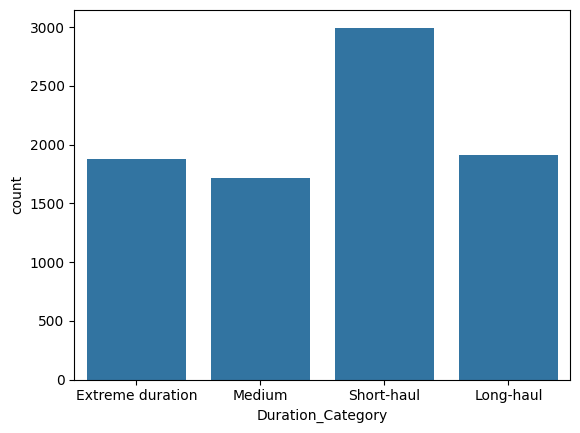

In [66]:
# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

In [67]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,Extreme duration
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,Medium
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,Short-haul
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,Short-haul
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,Long-haul


# 7. Working on numeric data


In [68]:
# Loading a new dataset
salaries = pd.read_csv("./course_datasets/eda_datasets/datasets/ds_salaries_clean.csv")

In [69]:
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [70]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 38.1+ KB


### Using `.transform` method:
- Adding columns for standard deviation of salaries based on Experience (rounded to 2 decimal places)

In [71]:
salaries["std_dev"] = salaries.groupby("Experience")["Salary_USD"].transform(lambda x: round(x.std(),2))
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,std_dev
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,61014.88
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,55086.26
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0,55086.26
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0,61014.88
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0,55086.26


Passing multiple values into value_counts() outputs the value count of the combination.

In given dataframe, senior employees' salaries appear to have higher variance in their salaries

In [72]:
salaries[["Experience","std_dev"]].value_counts()

Experience  std_dev  
Senior      55086.26     280
Mid         61014.88     213
Entry       42390.36      88
Executive   111783.58     26
Name: count, dtype: int64

- Adding column for median salary by company size

In [73]:
salaries["median_byCoSize"] = salaries.groupby("Company_Size")["Salary_USD"].transform(lambda x: round(x.median(),2))
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,std_dev,median_byCoSize
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,61014.88,95483.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,55086.26,62064.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0,55086.26,108076.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0,61014.88,62064.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0,55086.26,95483.0


### Test Question
Converting the Duration column from string into a float dtype. Challenge here is to convert the minutes into decimal types for the float value to make sense. 

This will have to be done in parts. First format the string form of the duration values. THEN extract the minute part . Then divide by 60 & add to the hours part

In [74]:
planes.head(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,Extreme duration
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,Medium
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,Short-haul
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,Short-haul
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,Long-haul
5,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0,Extreme duration
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0,Extreme duration


In [75]:
5/60

0.08333333333333333

In [76]:
# replacing multiple characters ("h " and "m") at once
planes["Duration"] = planes["Duration"].replace({"h ":"," , "m":""},regex=True)
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,Extreme duration
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,"5,25",1 stop,No info,6218.0,Medium
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,"4,45",1 stop,No info,13302.0,Short-haul
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,"2,25",non-stop,No info,3873.0,Short-haul
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,"15,30",1 stop,In-flight meal not included,11087.0,Long-haul


In [77]:
# Checking if there's still any characters left in the dataframe
planes["Duration"].str.contains("h").value_counts()

Duration
False    7687
True      821
Name: count, dtype: int64

There's 821 rows containing only hours 'h' character. fixing such columns by adding ",0" 

The challenge here is to now fix only those rows of the dataframe that contain the "h" character. 

Use `.loc` with assignment -- This avoids the warning and is the most explicit way

In [78]:
# The incorrect way (tried earlier)
# planes[planes["Duration"].str.contains("h")].replace({"h":""},regex=True, inplace=True)
# planes.head()

In [79]:
# The correct way:
mask = planes["Duration"].str.contains("h")
planes.loc[mask,"Duration"] = planes.loc[mask,"Duration"].str.replace("h",",0")
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,"19,0",2 stops,No info,13882.0,Extreme duration
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,"5,25",1 stop,No info,6218.0,Medium
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,"4,45",1 stop,No info,13302.0,Short-haul
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,"2,25",non-stop,No info,3873.0,Short-haul
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,"15,30",1 stop,In-flight meal not included,11087.0,Long-haul


In [80]:
# Checking if there's still any characters left in the dataframe
planes["Duration"].str.contains("h").value_counts()

Duration
False    8508
Name: count, dtype: int64

No more characters , now converting minutes into decimals 

In [81]:
planes["Duration"] = planes["Duration"].str.split(",").apply(lambda x: int(x[0]) + (int(x[1])/60) if len(x) > 1 else int(x[0]))
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.000000,2 stops,No info,13882.0,Extreme duration
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.416667,1 stop,No info,6218.0,Medium
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.750000,1 stop,No info,13302.0,Short-haul
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2.416667,non-stop,No info,3873.0,Short-haul
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15.500000,1 stop,In-flight meal not included,11087.0,Long-haul


The "Duration" column has been converted into a float dtype now!

Taking a look at all the columns having numeric values now

In [82]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8508 entries, 0 to 10659
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            8508 non-null   object 
 1   Date_of_Journey    8508 non-null   object 
 2   Source             8508 non-null   object 
 3   Destination        8508 non-null   object 
 4   Route              8508 non-null   object 
 5   Dep_Time           8508 non-null   object 
 6   Arrival_Time       8508 non-null   object 
 7   Duration           8508 non-null   float64
 8   Total_Stops        8508 non-null   object 
 9   Additional_Info    8208 non-null   object 
 10  Price              8508 non-null   float64
 11  Duration_Category  8508 non-null   object 
dtypes: float64(2), object(10)
memory usage: 1.1+ MB


In [83]:
planes["Price_Std"] = planes.groupby("Airline")["Price"].transform(lambda x: round(x.std(),2))
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category,Price_Std
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.000000,2 stops,No info,13882.0,Extreme duration,4159.85
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.416667,1 stop,No info,6218.0,Medium,2245.53
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.750000,1 stop,No info,13302.0,Short-haul,2245.53
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2.416667,non-stop,No info,3873.0,Short-haul,1798.90
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15.500000,1 stop,In-flight meal not included,11087.0,Long-haul,4159.85


In [84]:
planes["Median_Duratn"] = planes.groupby("Airline")["Duration"].transform(lambda x: round(x.median(),2))
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category,Price_Std,Median_Duratn
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.000000,2 stops,No info,13882.0,Extreme duration,4159.85,13.33
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.416667,1 stop,No info,6218.0,Medium,2245.53,2.92
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.750000,1 stop,No info,13302.0,Short-haul,2245.53,2.92
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2.416667,non-stop,No info,3873.0,Short-haul,1798.90,2.50
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15.500000,1 stop,In-flight meal not included,11087.0,Long-haul,4159.85,13.33


In [85]:
planes["Price_Dstn_Mean"] = planes.groupby("Destination")["Price"].transform(lambda x: round(x.mean(),2))
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category,Price_Std,Median_Duratn,Price_Dstn_Mean
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.000000,2 stops,No info,13882.0,Extreme duration,4159.85,13.33,10473.59
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.416667,1 stop,No info,6218.0,Medium,2245.53,2.92,9093.62
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.750000,1 stop,No info,13302.0,Short-haul,2245.53,2.92,11579.31
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2.416667,non-stop,No info,3873.0,Short-haul,1798.90,2.50,9093.62
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15.500000,1 stop,In-flight meal not included,11087.0,Long-haul,4159.85,13.33,11579.31


### Calculating some summary statistics:
Based on summary stats, its observed that Jet Airways has the largest standard deviation in prices, Air India has the largest median of flight durations, and New Delhi is the most expensive destination on average.

In [86]:
planes.groupby("Airline")["Price"].std()

Airline
Air Asia             1979.826234
Air India            3692.609285
GoAir                2764.926625
IndiGo               2245.529140
Jet Airways          4159.846432
Multiple carriers    3558.323763
SpiceJet             1798.900648
Vistara              2888.915498
Name: Price, dtype: float64

In [87]:
planes.groupby("Airline")["Duration"].median()

Airline
Air Asia              2.833333
Air India            15.500000
GoAir                 2.916667
IndiGo                2.916667
Jet Airways          13.333333
Multiple carriers    10.250000
SpiceJet              2.500000
Vistara               3.166667
Name: Duration, dtype: float64

In [88]:
planes.groupby("Destination")["Price"].mean()

Destination
Banglore      9093.622872
Cochin       10473.585927
Delhi         5248.541082
Hyderabad     5190.274021
Kolkata       4907.156863
New Delhi    11579.306944
Name: Price, dtype: float64

# 8. Handling Outliers

<img alt="normal_distribution curve" src= "https://online.stat.psu.edu/public/stat800/lesson04/500%20l1%2025th%20and%2075th%20percentile.png" width="450">
&nbsp; &nbsp;
<img alt="box plot sample" src= "https://www.simplypsychology.org/wp-content/uploads/boxplot.jpg" width="400">

- Use of statistical methods such as `.describe()`, `.mean()`, `.std()`, `.quantile()` etc. to identify outliers. 
- Identify how far apart the minimum, maximum are / relationship between the mean, median values / inter-quartile ranges etc.
- Above statistics can be visualize using boxplots. Histograms, countplots can also be used

In [89]:
# 25% of the data (Salary_USD) lies below this value
print(f"25% of the data (Salary_USD) lies below this value - {salaries["Salary_USD"].quantile(0.25)}")

# 75% of the data (Salary_USD) lies below this value
print(f"75% of the data (Salary_USD) lies below this value - {salaries["Salary_USD"].quantile(0.75)}")



25% of the data (Salary_USD) lies below this value - 59893.0
75% of the data (Salary_USD) lies below this value - 143225.0


### Identifying outliers in the `salaries` dataset:
- Inter-quartile Range (IQR) = `75%ile - 25%ile`
- In a box plot, Upper outliers will be values > `75%ile + (1.5 * IQR)` ; 
- Whereas for lower outliers values < `25%ile - (1.5 * IQR)`

In [90]:
# IQR
iqr_salaries = salaries["Salary_USD"].quantile(0.75) - salaries["Salary_USD"].quantile(0.25)

# Upper limit: 
upper_limit = salaries["Salary_USD"].quantile(0.75) + (1.5 * iqr_salaries)

# Lower limit:
lower_limit = salaries["Salary_USD"].quantile(0.25) - (1.5 * iqr_salaries)


In [91]:
print(upper_limit, lower_limit)

268223.0 -65105.0


In [92]:
salaries["Salary_USD"].min()

np.float64(2730.0)

Filtering the outliers -- i.e the values outside of these limit ranges. 

These are the extreme values in the dataset. Having outliers in the dataset can skew the mean & standard deviation measures

In [93]:
salaries[(salaries["Salary_USD"]< lower_limit)|(salaries["Salary_USD"]>upper_limit)][["Experience","Employee_Location","Salary_USD"]]

,Experience,Employee_Location,Salary_USD
25,Executive,US,310321.0
33,Mid,US,429675.0
63,Senior,US,393392.0
97,Mid,US,429675.0
157,Mid,US,403895.0
225,Executive,US,397211.0
252,Executive,US,572900.0
482,Executive,US,309366.0
519,Senior,US,362837.0
523,Senior,US,386708.0


## What now?
Ask these question when dealing with outliers --
1. Why do these outliers exist? Do they have some commonality between them? 
    
    If so, will these values need to be grouped into a separate category?
2. Do these values _really_ look out of place? Could there be an error during the data collection?
3. If the outlying data needs to be deleted, gauge the impact of deleting these records from the dataset. 
    
    Consider the impact via summary statistics - with & without this data

In [94]:
# Summary statistic considering all values :
salaries["Salary_USD"].describe()

count       607.000000
mean     107225.836903
std       67752.393254
min        2730.000000
25%       59893.000000
50%       96982.000000
75%      143225.000000
max      572900.000000
Name: Salary_USD, dtype: float64

In [95]:
# Summary statistic considering without the outlier values ie. within the upper & lower limits :
no_outliers = salaries[(salaries["Salary_USD"]> lower_limit) & (salaries["Salary_USD"]<upper_limit)]

In [96]:
print(no_outliers.shape)
print(salaries.shape)

(597, 10)
(607, 10)


In [97]:
no_outliers["Salary_USD"].describe()

count       597.000000
mean     102328.480737
std       55910.790653
min        2730.000000
25%       59819.000000
50%       95483.000000
75%      141565.000000
max      263534.000000
Name: Salary_USD, dtype: float64

Notice : How the removal of merely 10 records significantly lowered the standard deviation & the maximum values in the dataset.

Lets plot a histogram of the two scenarios - data distribution is right-skewed in the original dataframe ; 

while the non-outlier data is relatively less skewed

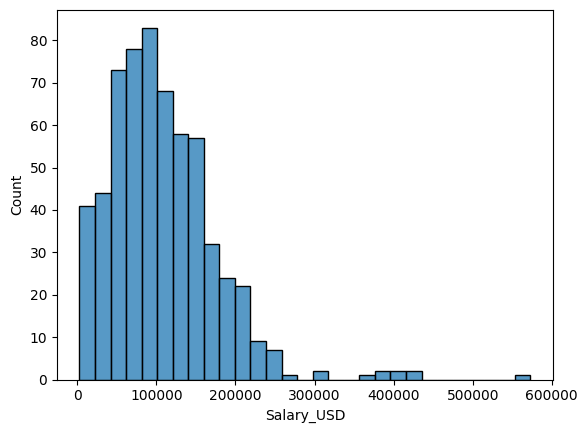

In [98]:
sns.histplot(data=salaries,x="Salary_USD")
plt.show()

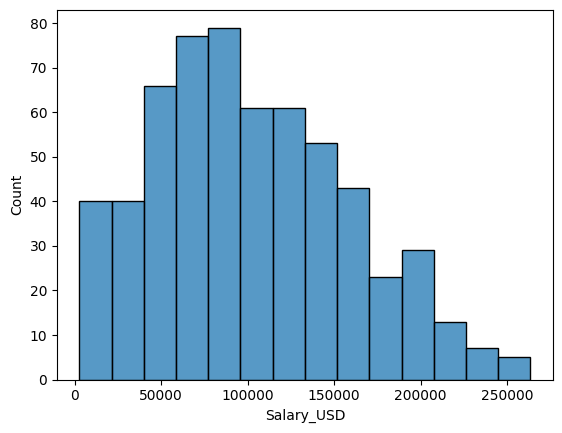

In [99]:
sns.histplot(data=no_outliers, x="Salary_USD")
plt.show()

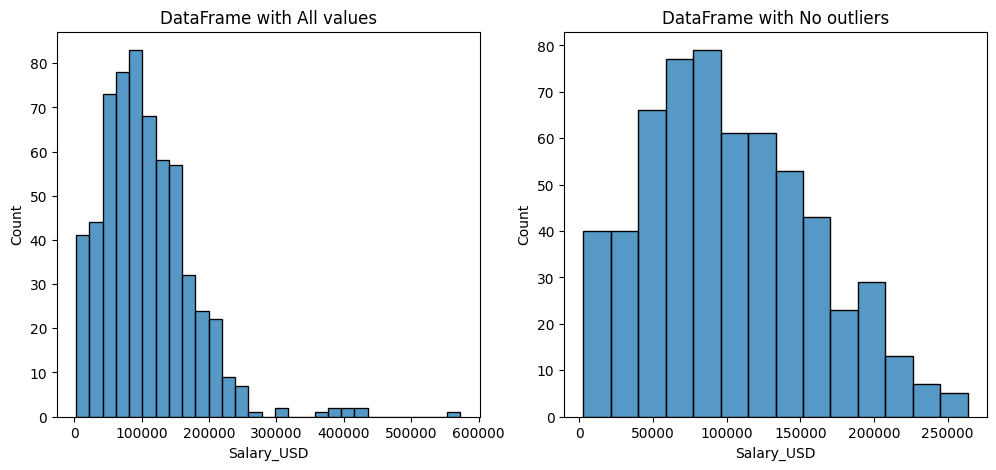

In [100]:
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(12,5))
# First plot
sns.histplot(data=salaries,x="Salary_USD",ax=ax[0])
ax[0].set_title("DataFrame with All values")

# Second plot
sns.histplot(data=no_outliers, x="Salary_USD",ax=ax[1])
ax[1].set_title("DataFrame with No outliers")


plt.show()


_____
### Test Questions
Try to figure out if there are outliers in the "Price" or "Duration" columns of the `planes` DataFrame.

Figure out if there're outliers in the ticket prices using data visualization

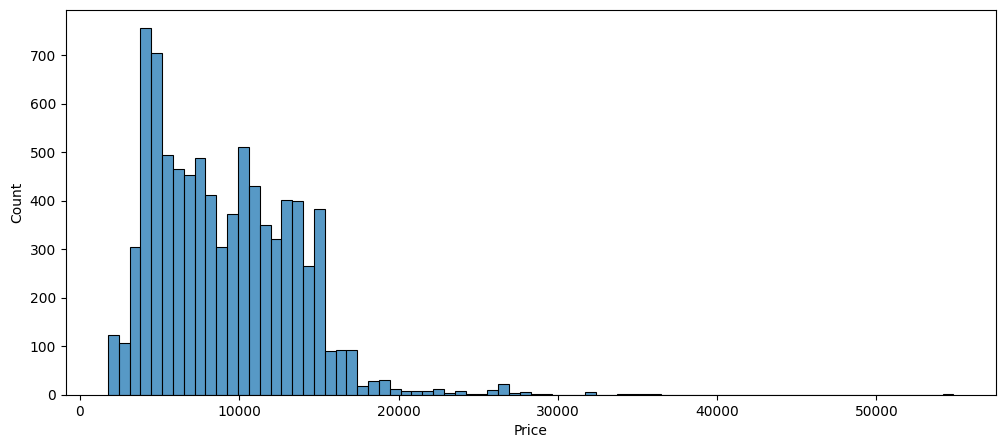

In [101]:
plt.figure(figsize=(12,5))
sns.histplot(data=planes, x="Price")
plt.show()

In [102]:
planes["Price"].describe()

count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64

Observations: the data for ticket prices shows a right-skewed distribution.

In [103]:
planes["Duration"].describe()

count    8508.000000
mean       10.730009
std         8.470214
min         1.250000
25%         2.833333
50%         8.666667
75%        15.500000
max        47.666667
Name: Duration, dtype: float64

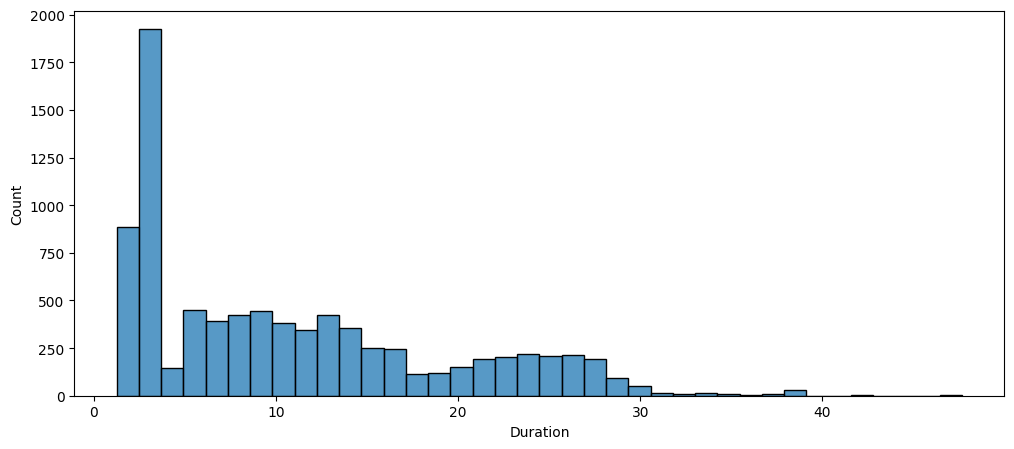

In [104]:
plt.figure(figsize=(12,5))
sns.histplot(data=planes, x="Duration")
plt.show()

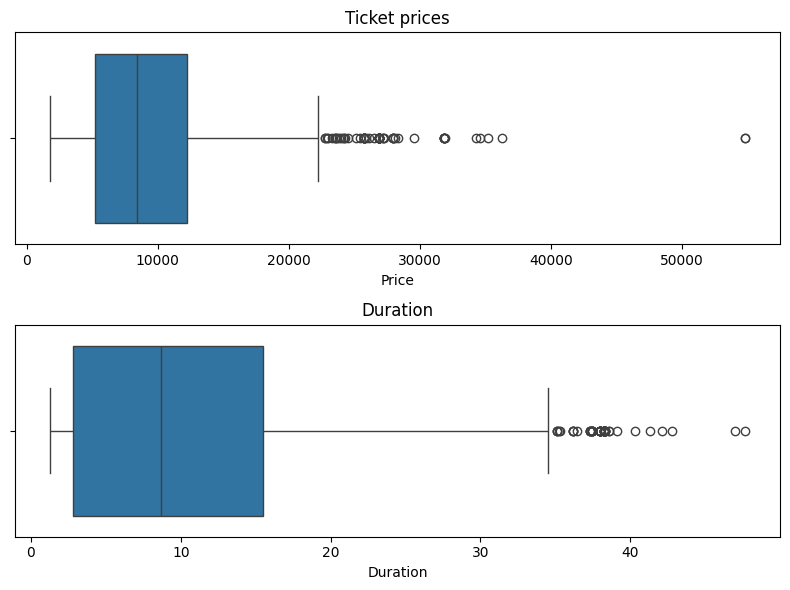

In [105]:
fig,ax = plt.subplots(nrows=2,ncols=1, figsize=(8,6))
# First plot
sns.boxplot(data=planes,x="Price",ax=ax[0])
ax[0].set_title("Ticket prices")

# Second plot
sns.boxplot(data=planes, x="Duration",ax=ax[1])
ax[1].set_title("Duration")

plt.tight_layout()
plt.show()

In [106]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category,Price_Std,Median_Duratn,Price_Dstn_Mean
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.000000,2 stops,No info,13882.0,Extreme duration,4159.85,13.33,10473.59
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.416667,1 stop,No info,6218.0,Medium,2245.53,2.92,9093.62
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.750000,1 stop,No info,13302.0,Short-haul,2245.53,2.92,11579.31
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2.416667,non-stop,No info,3873.0,Short-haul,1798.90,2.50,9093.62
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15.500000,1 stop,In-flight meal not included,11087.0,Long-haul,4159.85,13.33,11579.31


**Q: find the ticket prices with the outliers removed**

In [107]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
new_planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())

count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64
